<a href="https://colab.research.google.com/github/insh-samnani/Personal-Projects/blob/main/Project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Upload CSV File from your PC/Laptop

from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving Fish.csv to Fish (1).csv
User uploaded file "Fish.csv" with length 6022 bytes


In [ ]:
#Importing Libraries

import io 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
from statsmodels.formula.api import ols
from statsmodels.api import qqplot
from scipy.stats import norm
from scipy.stats import t
#import pingouin
from itertools import product

In [ ]:
#Creating DataFrame

fish = pd.read_csv(io.BytesIO(uploaded['Fish.csv']))

In [ ]:
#Showing first five records of our dataset

fish.head(5)

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [ ]:
#Printing correlation between all variables in the dataset

print(fish.corr())

           Weight   Length1   Length2   Length3    Height     Width
Weight   1.000000  0.915712  0.918618  0.923044  0.724345  0.886507
Length1  0.915712  1.000000  0.999517  0.992031  0.625378  0.867050
Length2  0.918618  0.999517  1.000000  0.994103  0.640441  0.873547
Length3  0.923044  0.992031  0.994103  1.000000  0.703409  0.878520
Height   0.724345  0.625378  0.640441  0.703409  1.000000  0.792881
Width    0.886507  0.867050  0.873547  0.878520  0.792881  1.000000


0.9995172657489312


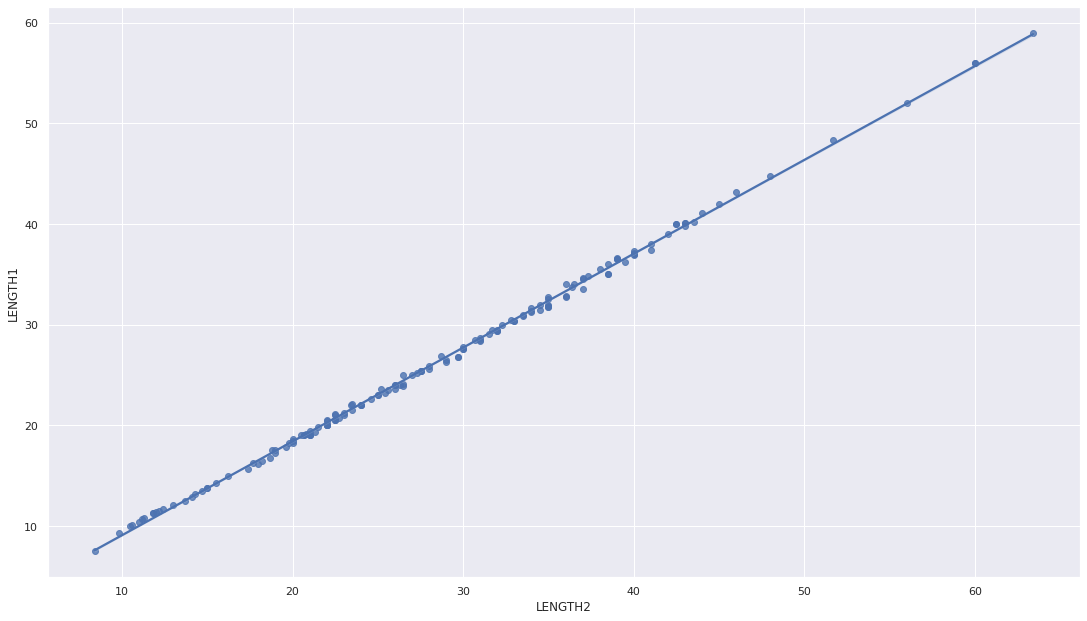

In [ ]:
#The following analysis shows that there is a strong positive (directed) correlation between explanatory (Length2) and response (Length1) variables. This means that as fish grows vertically, it will grow diagonally with the almost same rate. Similarly, this means that fish will grow in weight with almost same rate.

print(fish["Length1"].corr(fish["Length2"]))
fig = matplotlib.pyplot.gcf()
sns.regplot(x="Length2",y="Length1",data=fish)
plt.grid(True)
plt.xlabel("LENGTH2")
plt.ylabel("LENGTH1")
fig.set_size_inches(18.5, 10.5, forward=True)

In [ ]:
#The following analysis helps to find the ordinary least squares in the form of linear regression .Also the linear Regression equation on Length1 VS Length2 has been displayed.

mdl_fish=ols("Length1 ~ Length2",data=fish).fit()
print(mdl_fish.params) #As we can see that slope is positive, this means that it has been confirmed that there is a positive and direct relationship between both variables.

Intercept   -0.246885
Length2      0.932373
dtype: float64


In [ ]:
#Linear Regression equation on Length1 VS Species (explanatory variable is categorical: Species)

mdl_fish1=ols("Length1 ~ Species + 0",data=fish).fit() #You can also apply it on "Length2" and "Length3"
print(mdl_fish1.params) #Here it will simply show mean of each Specie, that can also be seen by groupby function written in next line. You can uncomment and execute it.
#netflix.groupby("Species")["Length1"].mean()

Species[Bream]        30.305714
Species[Parkki]       18.727273
Species[Perch]        25.735714
Species[Pike]         42.476471
Species[Roach]        20.645000
Species[Smelt]        11.257143
Species[Whitefish]    28.800000
dtype: float64


In [ ]:
#let us start making predictions. For example, what would be the Length1 if Length2 (diagonal length) is 42
explanatory_var=pd.DataFrame({"Length2":np.arange(40,60)})                                           #If you want to predict for all values, you can do so by: expl_data=fish["Length2"]
                                                                                                                                                                #print(mdl_fish.predict(expl_data))
                                                                                                                                                            #OR: print(mdl_fish.fittedvalues)
prediction_data=explanatory_var.assign(Length1_Predicted=mdl_fish.predict(explanatory_var))
print(prediction_data)

    Length2  Length1_Predicted
0        40          37.048037
1        41          37.980410
2        42          38.912783
3        43          39.845156
4        44          40.777530
5        45          41.709903
6        46          42.642276
7        47          43.574649
8        48          44.507022
9        49          45.439395
10       50          46.371768
11       51          47.304141
12       52          48.236514
13       53          49.168887
14       54          50.101260
15       55          51.033633
16       56          51.966006
17       57          52.898379
18       58          53.830752
19       59          54.763125


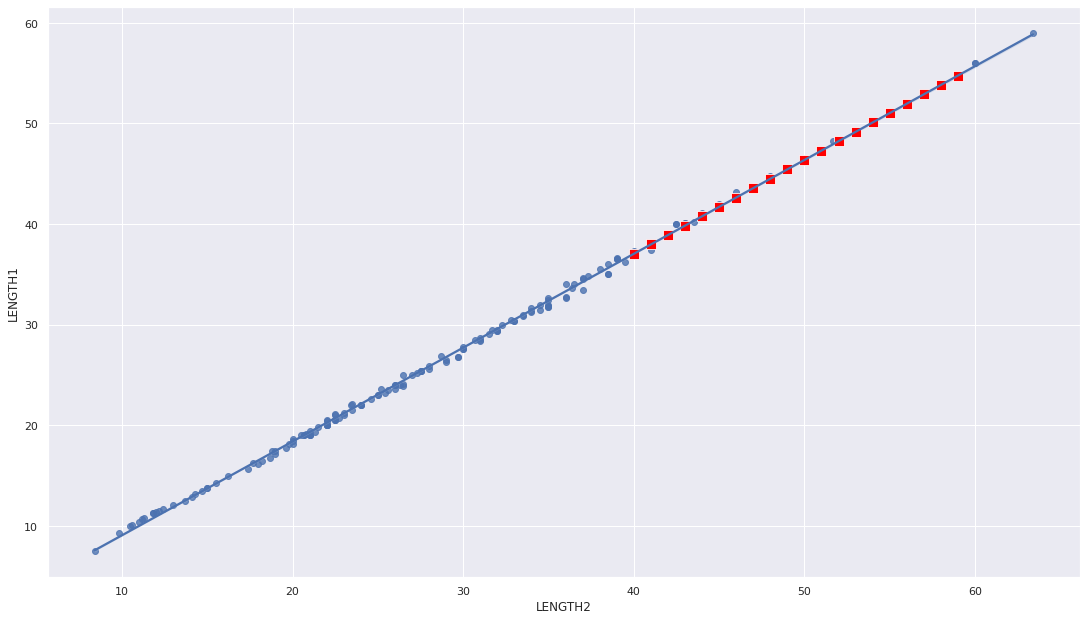

In [ ]:
#The analysis gives plotting for prediction data along with original data. We can see that the points for prediction data lies along with the linear regression line, and thus it is correctly predicting for response variable (Length1) by using explanatory variable ("Length2")

fig = matplotlib.pyplot.gcf()
sns.regplot(x="Length2",y="Length1",data=fish)
sns.scatterplot(x="Length2",y="Length1_Predicted",data=prediction_data,color="red",marker="s",s=100)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel("LENGTH2")
plt.ylabel("LENGTH1")
plt.grid(True)
plt.show()

In [ ]:
#Calculating MSE (Mean Square Error), RMSE (Root Mean Square Error) and RSE (Residual Standard Error) for our linear regression model

mse=mdl_fish.mse_resid
print(mse) #You will see that MSE is very low. It is approaching 0, hence a perfect linear regression model.
rse=np.sqrt(mse)
print(rse)
rmse_sq=mdl_fish.resid ** 2
rmse_sum_sq= sum(rmse_sq)
deg_of_freedom=len(fish.index)
rmse=np.sqrt(rmse_sum_sq/deg_of_freedom)
print(rmse)

0.09706921995838302
0.31155933617592496
0.3095936425072698


Text(0, 0.5, 'RESIDUALS')

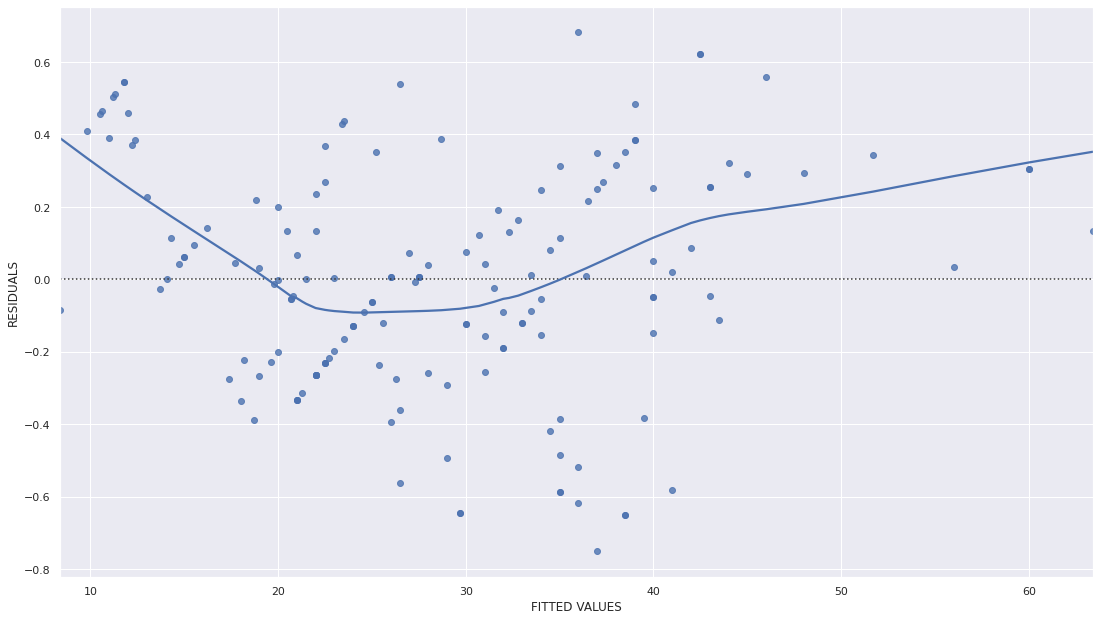

In [ ]:
#This along with next two plots will check for normal distribution of the data. We will prove that all three plots will show that the data is normally distributed. The points are spreaded through, hence the model is good.

fig = matplotlib.pyplot.gcf()
sns.residplot(x="Length2",y="Length1",data=fish,lowess=True)
plt.grid(True)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel("FITTED VALUES")
plt.ylabel("RESIDUALS")

#point are forming the curve of normal distribution along the line y=0

Text(0, 0.5, 'SAMPLE QUANTILES')

<Figure size 1332x756 with 0 Axes>

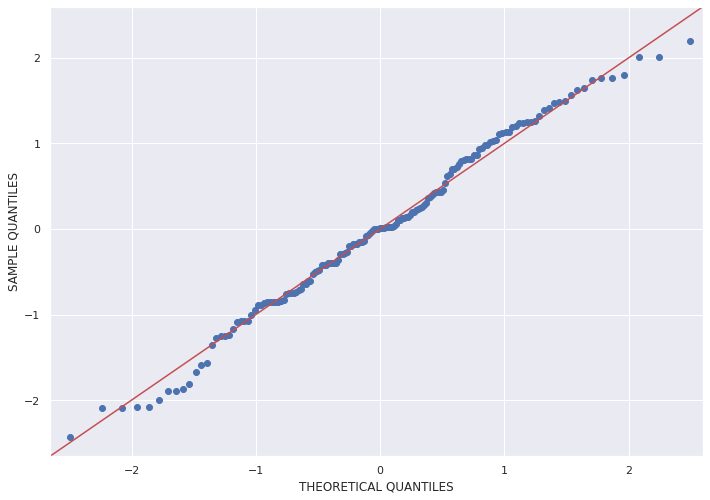

In [ ]:
fig = matplotlib.pyplot.gcf()
qqplot(data=mdl_fish.resid,fit=True,line="45")
fig.set_size_inches(18.5, 10.5, forward=True)
plt.grid(True)
plt.xlabel("THEORETICAL QUANTILES")
plt.ylabel("SAMPLE QUANTILES")

#Points lie along the line hence another proof that data is normally distributed

Text(0, 0.5, 'NORMALIZED RESIDUALS')

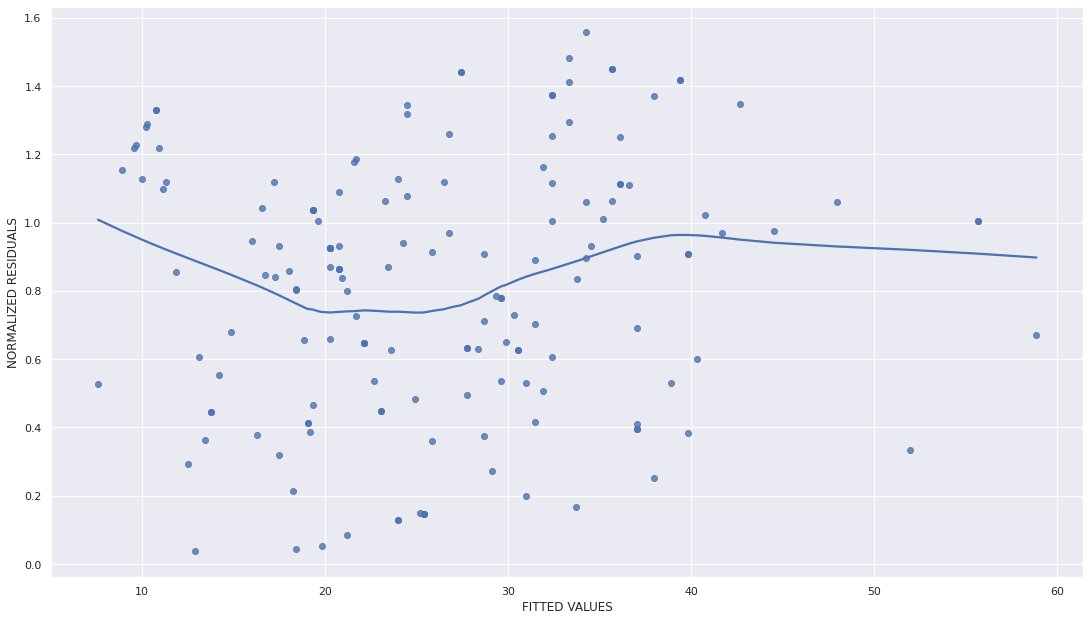

In [ ]:
fig = matplotlib.pyplot.gcf()
norm=mdl_fish.get_influence().resid_studentized_internal #Accessing normalized residuals
norm_sqrt=np.sqrt(np.abs(norm)) #Taking square root of those normalized residuals
sns.regplot(x=mdl_fish.fittedvalues,y=norm_sqrt,ci=None,lowess=True)
plt.grid(True)
fig.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel("FITTED VALUES")
plt.ylabel("NORMALIZED RESIDUALS")

#It is forming the proper curve and data points are randomly spreaded through out hence another proof that the linear regression model is good

In [ ]:
#When points lies away from the line in the linear regressionj model, we look for various outliers, leverages, and influences. In such cases (but not in our case), explanatory variables are extreme

fish_temp=fish
summary=mdl_fish.get_influence().summary_frame()
fish_temp["leverage"]=summary["hat_diag"] 
#leverage is a measure of how far away the independent variable values of an observation are from those of the other observations.
fish_temp["cooks_distance"]=summary["cooks_d"] #Important measure of influence
#In particular, in regression analysis an influential observation is one whose deletion has a large effect on the parameter estimates.

print(fish_temp.head())

  Species  Weight  Length1  Length2  Length3   Height   Width  leverage  \
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200  0.006791   
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056  0.006536   
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961  0.006492   
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555  0.006308   
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340  0.006308   

   cooks_distance  
0        0.001965  
1        0.002571  
2        0.010662  
3        0.007963  
4        0.002804  


In [ ]:
mdl_fish.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Length1   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 1.625e+05
Date:                Tue, 28 Jun 2022   Prob (F-statistic):          1.25e-238
Time:                        12:20:31   Log-Likelihood:                -39.185
No. Observations:                 159   AIC:                             82.37
Df Residuals:                     157   BIC:                             88.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2469      0.070     -3.516      0.001      -0.386      -0.108
Length2        0.9324      0.002    403.110      0.000       0.928       0.937
==============================================================================
Omnibus:                        2.154   Durbin-Watson:                   0.466
Prob(Omnibus):                  0.341   Jarque-Bera (JB):                1.740
Skew:                          -0.101   Prob(JB):                        0.419
Kurtosis:                       2.529   Cond. No.                         86.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **WIDTH-HEIGHT**



0.7928810172871048


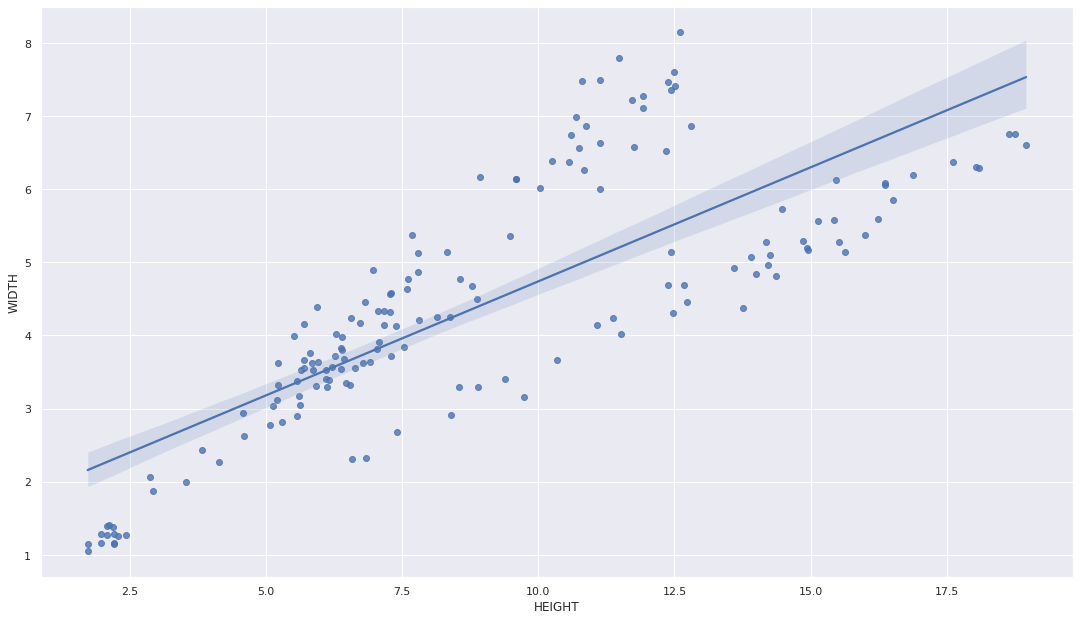

In [ ]:
#The following analysis shows that there is a strong positive (directed) correlation between explanatory (Height) and response (Width) variables. This means that as fish grows in height, it will grow in width with the quite similar rate. 

print(fish["Width"].corr(fish["Height"]))
fig1 = matplotlib.pyplot.gcf()
sns.regplot(x="Height",y="Width",data=fish)
plt.grid(True)
plt.xlabel("HEIGHT")
plt.ylabel("WIDTH")
fig1.set_size_inches(18.5, 10.5, forward=True)

In [ ]:
#The following analysis helps to find the ordinary least squares in the form of linear regression .Also the linear Regression equation on Width VS Height has been displayed.

mdl_fish1=ols("Width ~ Height",data=fish).fit()
print(mdl_fish1.params) #As we can see that slope is positive, this means that it has been confirmed that there is a positive and direct relationship between both variables.

Intercept    1.619906
Height       0.311847
dtype: float64


In [ ]:
#let us start making predictions. For example, what would be the Height if Width is 5
explanatory_var1=pd.DataFrame({"Height":np.arange(4,12)})                                           #If you want to predict for all values, you can do so by: expl_data=fish["Height"]
                                                                                                                                                                #print(mdl_fish.predict(expl_data))
                                                                                                                                                            #OR: print(mdl_fish.fittedvalues)
prediction_data1=explanatory_var1.assign(Width_Predicted=mdl_fish1.predict(explanatory_var1))
print(prediction_data1)

   Height  Width_Predicted
0       4         2.867295
1       5         3.179142
2       6         3.490989
3       7         3.802837
4       8         4.114684
5       9         4.426531
6      10         4.738378
7      11         5.050225


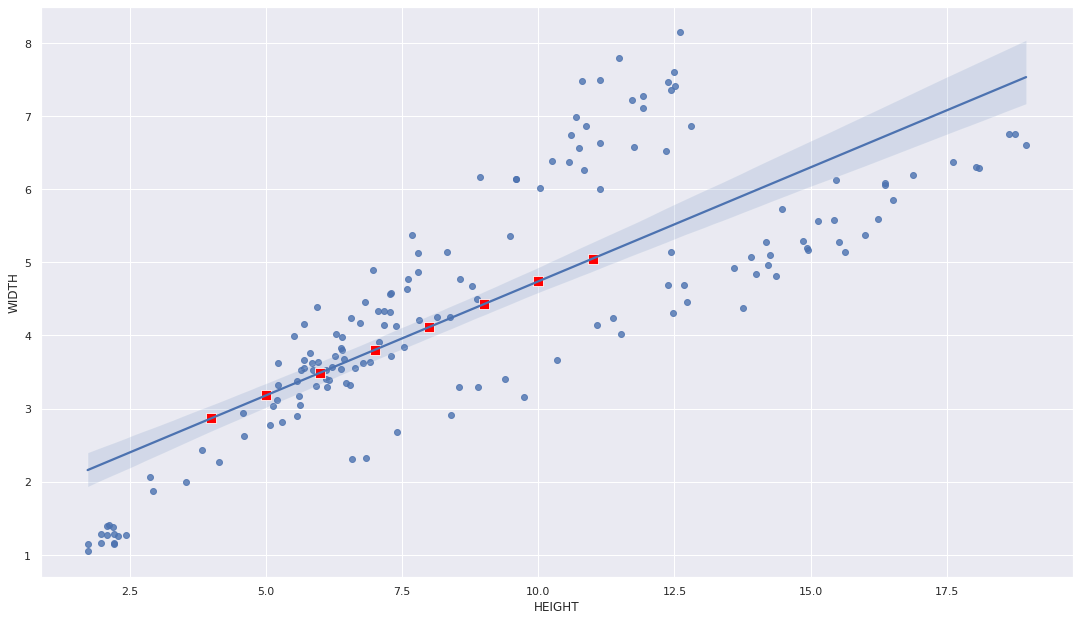

In [ ]:
#The analysis gives plotting for prediction data along with original data. We can see that the points for prediction data lies along with the linear regression line, and thus it is correctly predicting for response variable (Width) by using explanatory variable ("Height")

fig11 = matplotlib.pyplot.gcf()
sns.regplot(x="Height",y="Width",data=fish)
sns.scatterplot(x="Height",y="Width_Predicted",data=prediction_data1,color="red",marker="s",s=100)
fig11.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel("HEIGHT")
plt.ylabel("WIDTH")
plt.grid(True)
plt.show()

In [ ]:
#Calculating MSE (Mean Square Error), RMSE (Root Mean Square Error) and RSE (Residual Standard Error) for our linear regression model

mse1=mdl_fish1.mse_resid
print(mse1) #You will see that MSE is little high. It must approach to 0 for a perfect linear regression model.
rse1=np.sqrt(mse1)
print(rse1)
rmse_sq1=mdl_fish1.resid ** 2
rmse_sum_sq1= sum(rmse_sq1)
deg_of_freedom1=len(fish.index)
rmse1=np.sqrt(rmse_sum_sq1/deg_of_freedom1)
print(rmse1)

1.0620449564880292
1.0305556542409677
1.0240536609141027


Text(0, 0.5, 'RESIDUALS')

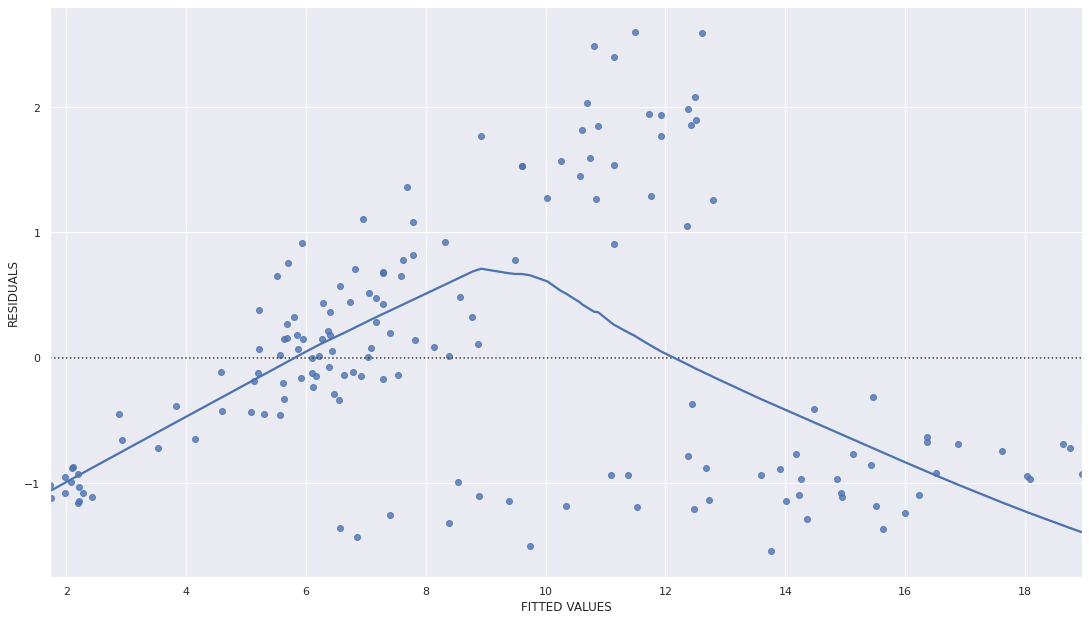

In [ ]:
#This along with next two plots will check for normal distribution of the data. We will prove that all three plots will show that the data is somewhat normally distributed. The points are spreaded except some points, hence the model is quite good.

figA = matplotlib.pyplot.gcf()
sns.residplot(x="Height",y="Width",data=fish,lowess=True)
plt.grid(True)
figA.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel("FITTED VALUES")
plt.ylabel("RESIDUALS")

#point are silgthly forming the curve of normal distribution along the line y=0

Text(0, 0.5, 'SAMPLE QUANTILES')

<Figure size 1332x756 with 0 Axes>

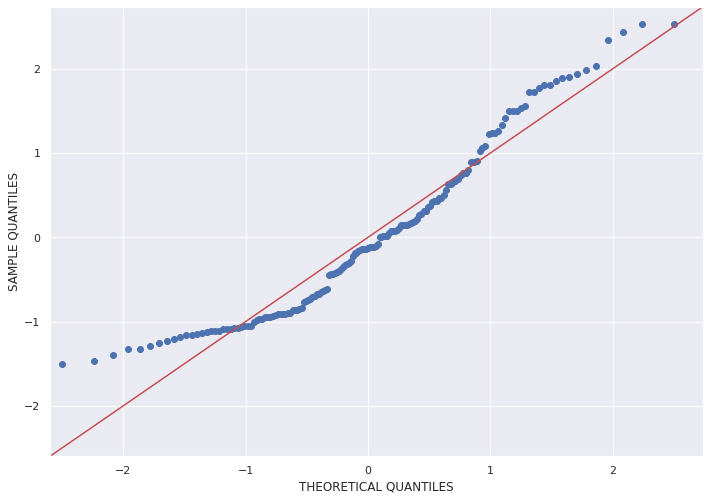

In [ ]:
figB = matplotlib.pyplot.gcf()
qqplot(data=mdl_fish1.resid,fit=True,line="45")
figB.set_size_inches(18.5, 10.5, forward=True)
plt.grid(True)
plt.xlabel("THEORETICAL QUANTILES")
plt.ylabel("SAMPLE QUANTILES")

#Points almost lie along the line hence it proves that data is quite normally distributed

Text(0, 0.5, 'NORMALIZED RESIDUALS')

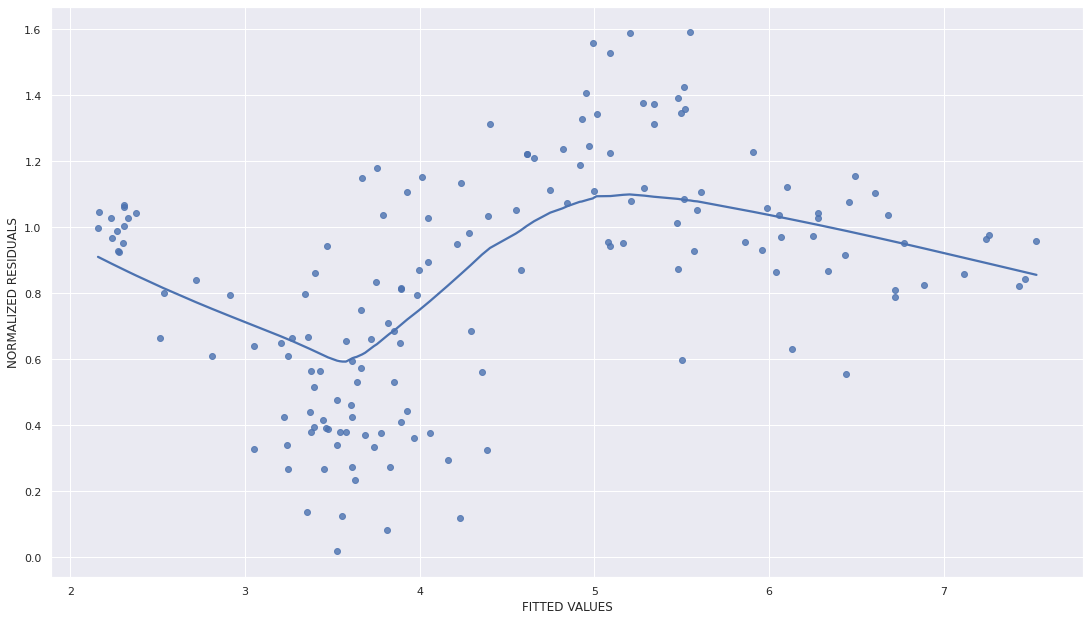

In [ ]:
figC = matplotlib.pyplot.gcf()
norm1=mdl_fish1.get_influence().resid_studentized_internal #Accessing normalized residuals
norm_sqrt1=np.sqrt(np.abs(norm1)) #Taking square root of those normalized residuals
sns.regplot(x=mdl_fish1.fittedvalues,y=norm_sqrt1,ci=None,lowess=True)
plt.grid(True)
figC.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel("FITTED VALUES")
plt.ylabel("NORMALIZED RESIDUALS")

#It is almost forming the curve and data points are randomly spreaded through out hence another proof that the linear regression model is quite good

In [ ]:
#When points lies away from the line in the linear regressionj model, we look for various outliers, leverages, and influences. In such cases (but not in our case), explanatory variables are extreme

fish_temp=fish
summary=mdl_fish1.get_influence().summary_frame()
fish_temp["leverage"]=summary["hat_diag"] 
#leverage is a measure of how far away the independent variable values of an observation are from those of the other observations.
fish_temp["cooks_distance"]=summary["cooks_d"] #Important measure of influence
#In particular, in regression analysis an influential observation is one whose deletion has a large effect on the parameter estimates.
print(fish_temp.head())

  Species  Weight  Length1  Length2  Length3   Height   Width  leverage  \
0   Bream   242.0     23.2     25.4     30.0  11.5200  4.0200  0.008528   
1   Bream   290.0     24.0     26.3     31.2  12.4800  4.3056  0.010531   
2   Bream   340.0     23.9     26.5     31.1  12.3778  4.6961  0.010288   
3   Bream   363.0     26.3     29.0     33.5  12.7300  4.4555  0.011157   
4   Bream   430.0     26.5     29.0     34.0  12.4440  5.1340  0.010445   

   cooks_distance  
0        0.005807  
1        0.007367  
2        0.003038  
3        0.006911  
4        0.000675  


In [ ]:
#Going through the summary of the linear regression model that we have prepared

mdl_fish1.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Width   R-squared:                       0.629
Model:                            OLS   Adj. R-squared:                  0.626
Method:                 Least Squares   F-statistic:                     265.8
Date:                Tue, 28 Jun 2022   Prob (F-statistic):           1.35e-35
Time:                        12:20:34   Log-Likelihood:                -229.39
No. Observations:                 159   AIC:                             462.8
Df Residuals:                     157   BIC:                             468.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6199      0.190      8.523      0.000       1.244       1.995
Height         0.3118      0.019     16.303      0.000       0.274       0.350
==============================================================================
Omnibus:                       12.288   Durbin-Watson:                   0.291
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               12.847
Skew:                           0.659   Prob(JB):                      0.00162
Kurtosis:                       2.549   Cond. No.                         23.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### **MULTIPLE REGRESSION**

In [ ]:
#Preparing dataset for multiple regression with an additional column of "length_mean"

fish_mult=fish
fish_mult['length_mean']=(fish_mult['Length1']+fish_mult['Length2']+fish_mult['Length3'])/3

In [ ]:
#Let us check about correlations between different variables

fish_mult.corr()

,Weight,Length1,Length2,Length3,Height,Width,length_mean
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507,0.920817
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050,0.998614
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547,0.999370
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520,0.997214
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881,0.659481
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000,0.874757
length_mean,0.920817,0.998614,0.999370,0.997214,0.659481,0.874757,1.000000


In [ ]:
#Generating model when explanatory variables are numeric along with categorical

model_mult=ols("Weight ~ length_mean + Species + 0",data=fish_mult).fit()
print(model_mult.params)

#The global slope wrt length_mean is positive. This means that as length of a fish increases, its weight increases

Species[Bream]        -742.364360
Species[Parkki]       -672.023344
Species[Perch]        -729.774475
Species[Pike]        -1108.050321
Species[Roach]        -755.337190
Species[Smelt]        -472.845275
Species[Whitefish]    -731.153439
length_mean             40.096650
dtype: float64


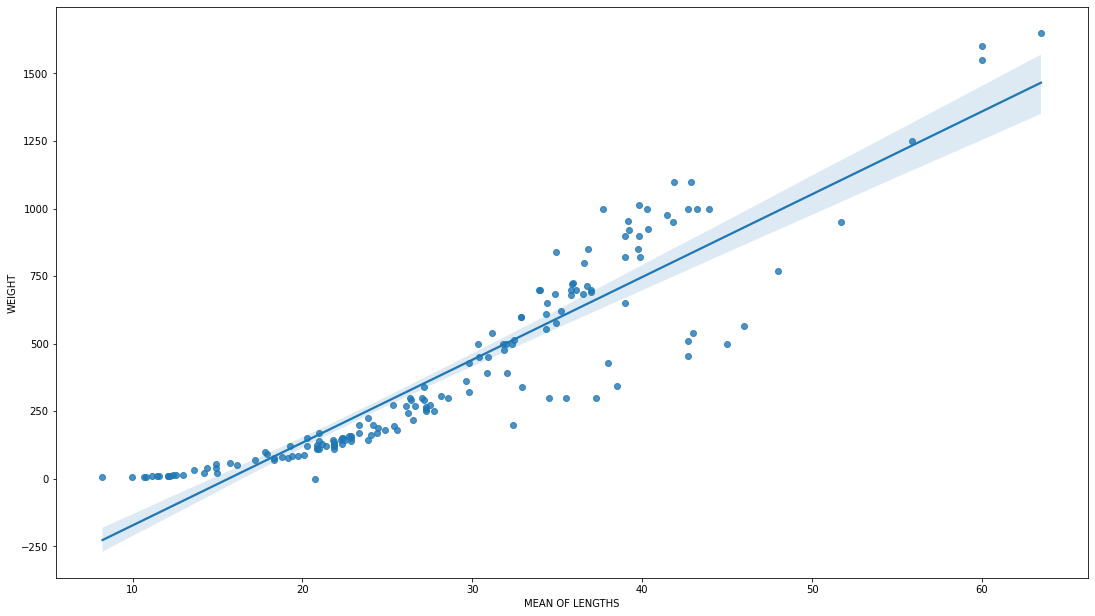

In [ ]:
#Visualizing numeric variable alone

figC = matplotlib.pyplot.gcf()
sns.regplot(x='length_mean',y='Weight',data=fish_mult)
plt.xlabel('MEAN OF LENGTHS')
plt.ylabel('WEIGHT')
figC.set_size_inches(18.5, 10.5, forward=True)
plt.show()

#As we previously observed that correlation between mean lengths and weight is strongly positive given by 0.9. Hence it can be cross checked via visualizing it through regplot. We can see the data points are close enough to the regression line. Thus as length of a fish increases, its weight increases

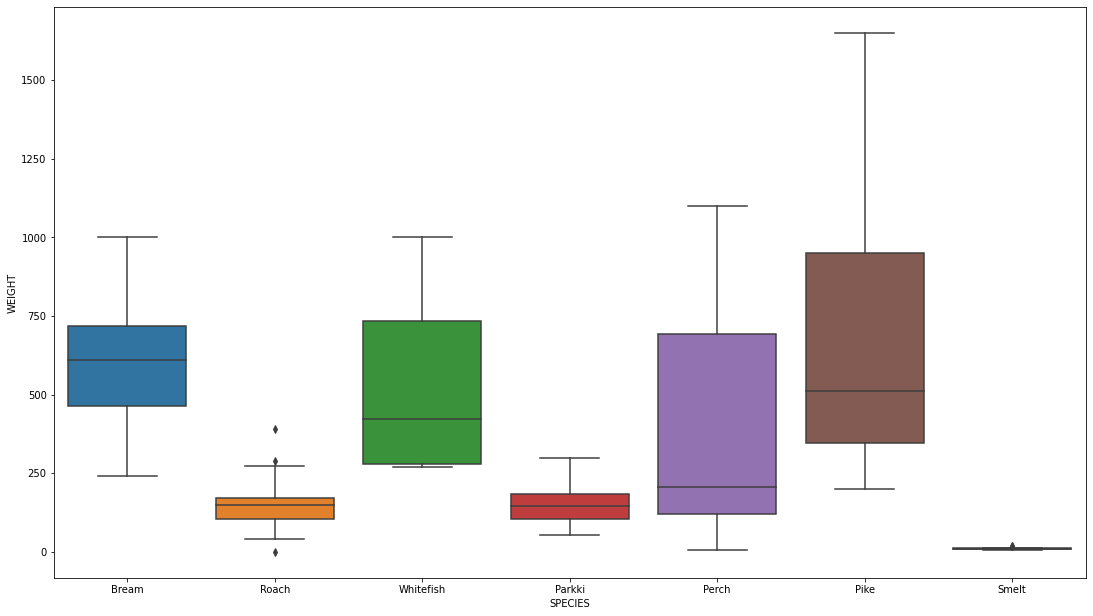

In [ ]:
#Visualizing categorical variable alone

figC = matplotlib.pyplot.gcf()
sns.boxplot(x='Species',y='Weight',data=fish_mult)
plt.xlabel('SPECIES')
plt.ylabel('WEIGHT')
figC.set_size_inches(18.5, 10.5, forward=True)
plt.show()

#Amongst all, we can see that the bream species are more heavier as compare to other species as it has largest median amongst all

-742.3643595048758


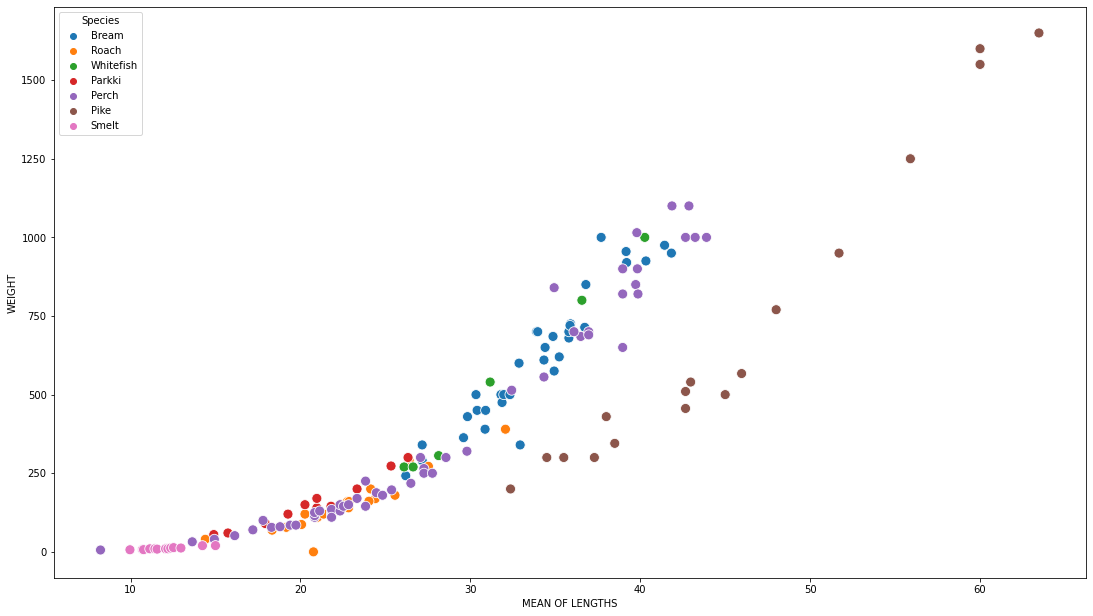

In [ ]:
#Visualizing both at a time

coeffs=model_mult.params #Extracting model's coefficient
ic_bream, ic_parkki, ic_perch, ic_pike, ic_roach, ic_smelt, ic_whitefish, slope=coeffs #Assigning each of the coefficients
figC = matplotlib.pyplot.gcf()
sns.scatterplot(x='length_mean',y='Weight',hue='Species',data=fish_mult,s=100)
plt.axline(xy1=(0, ic_bream), slope=slope, color="blue") #Each line will be parallel to one another as their slopes are equal
plt.axline(xy1=(0, ic_parkki), slope=slope, color="red")
plt.axline(xy1=(0, ic_pike), slope=slope, color="brown")
plt.axline(xy1=(0, ic_roach), slope=slope, color="orange")
plt.axline(xy1=(0, ic_smelt), slope=slope, color="pink")
plt.axline(xy1=(0, ic_whitefish), slope=slope, color="green")
figC.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel('MEAN OF LENGTHS')
plt.ylabel('WEIGHT')
plt.show()

#The plot is the combined of both of the above displayed plots showing strong positive correlation between mean lengths and weight for different species

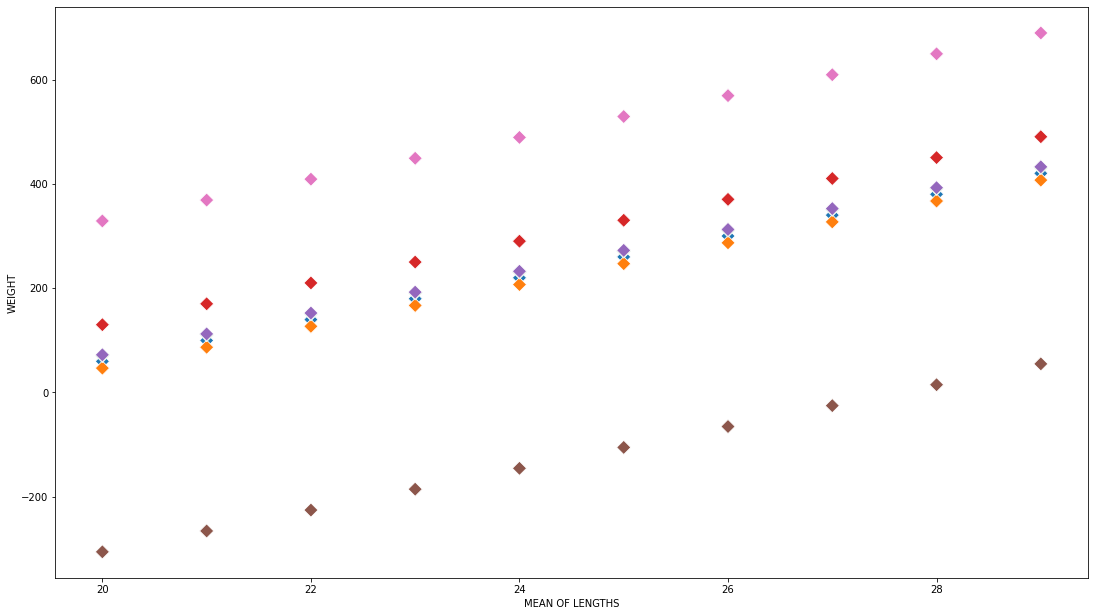

In [ ]:
#Making predictions on our model having multiple explanatory variables

figC = matplotlib.pyplot.gcf()
plt.axline(xy1=(0, ic_bream), slope=slope, color="blue") #Each line will be parallel to one another as their slopes are equal
plt.axline(xy1=(0, ic_parkki), slope=slope, color="red")
plt.axline(xy1=(0, ic_pike), slope=slope, color="brown")
plt.axline(xy1=(0, ic_roach), slope=slope, color="orange")
plt.axline(xy1=(0, ic_smelt), slope=slope, color="pink")
plt.axline(xy1=(0, ic_whitefish), slope=slope, color="green")
length=np.arange(20,30)
species=fish_mult['Species'].unique()
p=product(length,species)
explanatory_data = pd.DataFrame(p,columns=['length_mean','Species']) #columns name should be same as that in the dataset
prediction_data = explanatory_data.assign(Weight=model_mult.predict(explanatory_data)) #It will store preductions for each combination of length_mean and specie
sns.scatterplot(x='length_mean',y='Weight',hue='Species',data=prediction_data,s=100,marker='D',legend=False)
figC.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel('MEAN OF LENGTHS')
plt.ylabel('WEIGHT')
plt.show()

In [ ]:
#We can also manually calculating predictions

conditions=[explanatory_data['Species']=='Bream',explanatory_data['Species']=='Parkki',explanatory_data['Species']=='Perch',explanatory_data['Species']=='Pike',explanatory_data['Species']=='Roach',explanatory_data['Species']=='Smelt',explanatory_data['Species']=='Whitefish']
choices=[ic_bream, ic_parkki, ic_perch, ic_pike, ic_roach, ic_smelt, ic_whitefish]
intercept=np.select(conditions,choices)
prediction_data = explanatory_data.assign(intercept = intercept, Weight = intercept + slope * explanatory_data['length_mean'])

#Now you can plot the scatter plot of prediction data, same as above

In [ ]:
#Measuring the model's performance

print(model_mult.rsquared) #Its around 0.933, which means our model is perfect. It will maken almost correct predictions about Weight if the Specie and Mean Length is known
print(model_mult.rsquared_adj)
print(np.sqrt(model_mult.mse_resid)) #This means that it gets "Weight" wrong by just 95 grams

0.9326543065669269
0.9295323207786388
95.02802553723737


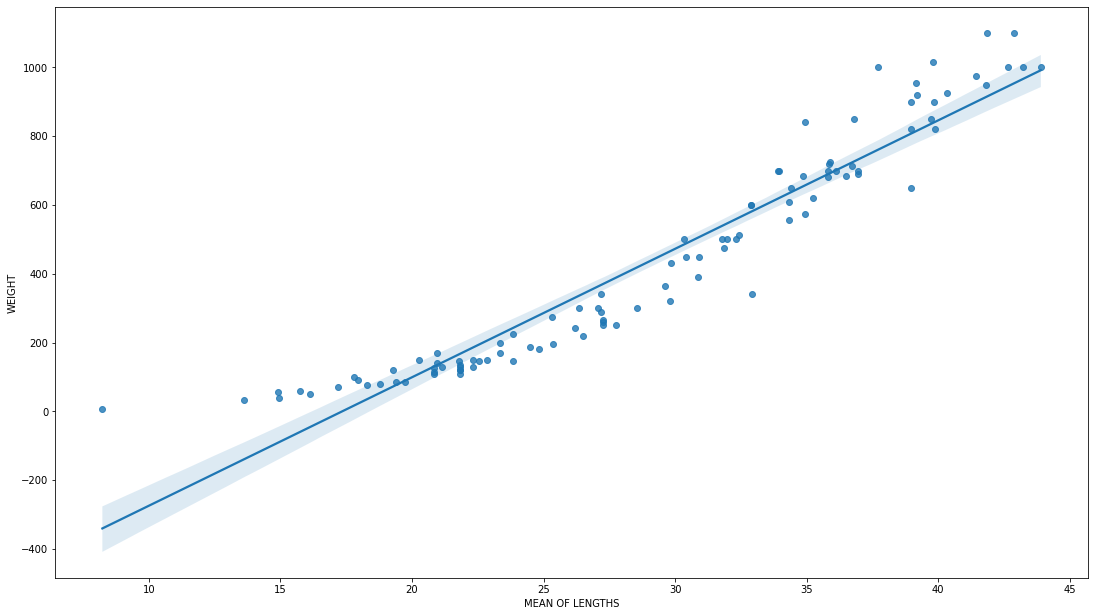

In [ ]:
#The parallel slope model enforce the common slope for each category which is not always good. You can also create different models for each specie. Let us consider three species, "Bream", "Perch", and "Parkki"
#First checking if our dataset and its subset won't contradict their slopes

fish_red=fish_mult[(fish_mult['Species']=='Bream') | (fish_mult['Species']=='Perch') | (fish_mult['Species']=='Parkki')]

#Visualizing the whole dataset

figC = matplotlib.pyplot.gcf()
sns.regplot(x='length_mean',y='Weight',data=fish_red)
figC.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel('MEAN OF LENGTHS')
plt.ylabel('WEIGHT')
plt.show()

<Figure size 1332x756 with 0 Axes>

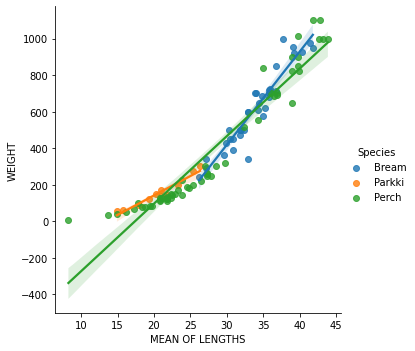

In [ ]:
#Visulaizing the subsets

figC = matplotlib.pyplot.gcf()
sns.lmplot(x='length_mean',y='Weight',hue='Species',data=fish_red)
figC.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel('MEAN OF LENGTHS')
plt.ylabel('WEIGHT')
plt.show()

#Hence, we are pretty sure that their slopes won't contradict as in both plots, as x increases and so does y. Hence there is a direct relation between Mean Lengths and Weight for different Species

   length_mean      Weight Species
0           20  -90.412129   Bream
1           21  -39.543210   Bream
2           22   11.325710   Bream
3           23   62.194629   Bream
4           24  113.063549   Bream
5           25  163.932469   Bream
6           26  214.801388   Bream
7           27  265.670308   Bream
8           28  316.539228   Bream
9           29  367.408147   Bream
0           20   96.956151   Perch
1           21  133.846211   Perch
2           22  170.736272   Perch
3           23  207.626332   Perch
4           24  244.516393   Perch
5           25  281.406453   Perch
6           26  318.296514   Perch
7           27  355.186575   Perch
8           28  392.076635   Perch
9           29  428.966696   Perch
0           20  141.615619  Parkki
1           21  162.868525  Parkki
2           22  184.121432  Parkki
3           23  205.374338  Parkki
4           24  226.627245  Parkki
5           25  247.880152  Parkki
6           26  269.133058  Parkki
7           27  290.

/usr/local/lib/python3.7/dist-packages/seaborn/regression.py:592: UserWarning: legend_out is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


<Figure size 1332x756 with 0 Axes>

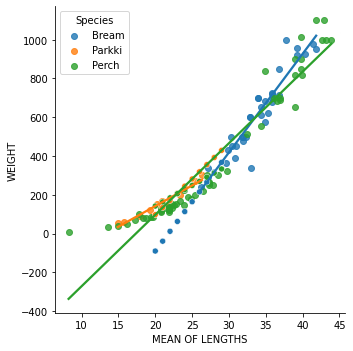

In [ ]:
#Cont..

fish_red['Species'].unique()
bream=fish_mult[fish_mult['Species']=='Bream'] #Subsetting our dataset with only those rows that are having details of Fishes belonging to "Bream" Category
perch=fish_mult[fish_mult['Species']=='Perch']
parkki=fish_mult[fish_mult['Species']=='Parkki']
figC = matplotlib.pyplot.gcf()
mdl_bream=ols('Weight ~ length_mean',data=bream).fit() #Preparing model for each subset
mdl_perch=ols('Weight ~ length_mean',data=perch).fit()
mdl_parkki=ols('Weight ~ length_mean',data=parkki).fit()
exp_data=pd.DataFrame({'length_mean' : np.arange(20,30)}) #Preparing common explanatory dataframe for each specie
pred_data_bream=exp_data.assign(Weight=mdl_bream.predict(exp_data),Species='Bream')
pred_data_perch=exp_data.assign(Weight=mdl_perch.predict(exp_data),Species='Perch')
pred_data_parkki=exp_data.assign(Weight=mdl_parkki.predict(exp_data),Species='Parkki')
pred_data=pd.concat([pred_data_bream,pred_data_perch,pred_data_parkki]) #Merging all predictions as a common DataFrame
print(pred_data)
sns.lmplot(x='length_mean',y='Weight',hue='Species',data=fish_red,ci=None,legend_out=False) #Cannot use regplot to show the regression model for each specie, instead use lmplot
sns.scatterplot(x='length_mean',y='Weight',hue='Species',data=pred_data,legend=False)
figC.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel('MEAN OF LENGTHS')
plt.ylabel('WEIGHT')
plt.show()

#Hence we can observe that the data points which we predicted lies quite closer to the respective regressive lines for different species. The relationship between the different variables is still same

In [ ]:
#Now you can test the performance of each model individually

print(mdl_bream.rsquared)
print(mdl_perch.rsquared)
print(mdl_parkki.rsquared)

#Parkki has more improved its performance over the regression model for its dataset. Where as perch have same sum of residuals but bream have lower its improvement over its subset dataset

print(mdl_parkki.rsquared_adj)
print(mdl_parkki.rsquared_adj)
print(mdl_parkki.rsquared_adj)

print(np.sqrt(mdl_bream.mse_resid)) #you can observe that each "Specie" group is giving less amout of error as compared to when they were calculated as the part of whole dataset
print(np.sqrt(mdl_perch.mse_resid))
print(np.sqrt(mdl_parkki.mse_resid))

0.8921450879941101
0.9196354640036836
0.9439921459424131
0.9377690510471257
0.9377690510471257
0.9377690510471257
69.73904313228988
99.45316046930995
19.646347620911865


In [ ]:
#But it becomes difficult to interact with different models for different species. You can also make one interactive model like:

model_both_inter=ols('Weight ~ Species + Species:length_mean + 0',data=fish_red).fit()
print(model_both_inter.params) #You will find the slopes and intercepts for each species as same as they were for separately defined models. All three sepcies have positive slopes, defining the positive and direct relation between the mean lengths and weight of different species, giving us a clue that we can make true predictions for weights of different species using their mean lengths

Species[Bream]                -1107.790522
Species[Parkki]                -283.442513
Species[Perch]                 -640.845061
Species[Bream]:length_mean       50.868920
Species[Parkki]:length_mean      21.252907
Species[Perch]:length_mean       36.890061
dtype: float64


    length_mean Species      Weight
0            20   Bream  -90.412129
1            20  Parkki  141.615619
2            20   Perch   96.956151
3            21   Bream  -39.543210
4            21  Parkki  162.868525
5            21   Perch  133.846211
6            22   Bream   11.325710
7            22  Parkki  184.121432
8            22   Perch  170.736272
9            23   Bream   62.194629
10           23  Parkki  205.374338
11           23   Perch  207.626332
12           24   Bream  113.063549
13           24  Parkki  226.627245
14           24   Perch  244.516393
15           25   Bream  163.932469
16           25  Parkki  247.880152
17           25   Perch  281.406453
18           26   Bream  214.801388
19           26  Parkki  269.133058
20           26   Perch  318.296514
21           27   Bream  265.670308
22           27  Parkki  290.385965
23           27   Perch  355.186575
24           28   Bream  316.539228
25           28  Parkki  311.638871
26           28   Perch  392

<Figure size 1332x756 with 0 Axes>

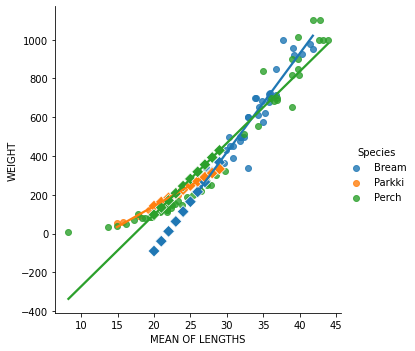

In [ ]:
#Now in order to make the predictions on this interactive model, we will use exactly the same method as we used for the parallel slope model. The code is now reduced. Results, analysis, and conclusions are still same

length=np.arange(20,30)
species=fish_red['Species'].unique()
p=product(length,species)
explanatory_data = pd.DataFrame(p,columns=['length_mean','Species']) #columns name should be same as that in the dataset
prediction_data = explanatory_data.assign(Weight=model_both_inter.predict(explanatory_data))
print(prediction_data)
figC = matplotlib.pyplot.gcf()
sns.lmplot(x='length_mean',y='Weight',hue='Species',data=fish_red,ci=None)
sns.scatterplot(x='length_mean',y='Weight',hue='Species',data=prediction_data,s=70,marker='D',legend=False)
figC.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel('MEAN OF LENGTHS')
plt.ylabel('WEIGHT')
plt.show()

In [ ]:
#If you want to calculate the predictions manually, you will again use the same method, the results will be same

coeffs=model_both_inter.params 
ic_bream, ic_parkki, ic_perch, slope_bream,slope_parkki,slope_perch=coeffs
conditions=[explanatory_data['Species']=='Bream',explanatory_data['Species']=='Parkki',explanatory_data['Species']=='Perch']
choices_inter=[ic_bream, ic_parkki, ic_perch]
choices_slope=[slope_bream,slope_parkki,slope_perch]
intercept=np.select(conditions,choices_inter)
slope=np.select(conditions,choices_slope)
prediction_data = explanatory_data.assign(Weight = intercept + slope * explanatory_data['length_mean'])
print(prediction_data)

    length_mean Species      Weight
0            20   Bream  -90.412129
1            20  Parkki  141.615619
2            20   Perch   96.956151
3            21   Bream  -39.543210
4            21  Parkki  162.868525
5            21   Perch  133.846211
6            22   Bream   11.325710
7            22  Parkki  184.121432
8            22   Perch  170.736272
9            23   Bream   62.194629
10           23  Parkki  205.374338
11           23   Perch  207.626332
12           24   Bream  113.063549
13           24  Parkki  226.627245
14           24   Perch  244.516393
15           25   Bream  163.932469
16           25  Parkki  247.880152
17           25   Perch  281.406453
18           26   Bream  214.801388
19           26  Parkki  269.133058
20           26   Perch  318.296514
21           27   Bream  265.670308
22           27  Parkki  290.385965
23           27   Perch  355.186575
24           28   Bream  316.539228
25           28  Parkki  311.638871
26           28   Perch  392

In [ ]:
#Now what if we have two explanatory variables that are numeric

model_mult_numeric=ols('Weight ~ length_mean + Width',data=fish_mult).fit()
print(model_mult_numeric.params) #Giving one global intercept and one slope for each explanatory variable. Both slopes are positive. It means that both have direct and positive relationship with Weight. Hence as the length and width of fishes increases, their weight will also increase

Intercept     -515.108803
length_mean     20.599825
Width           73.268530
dtype: float64


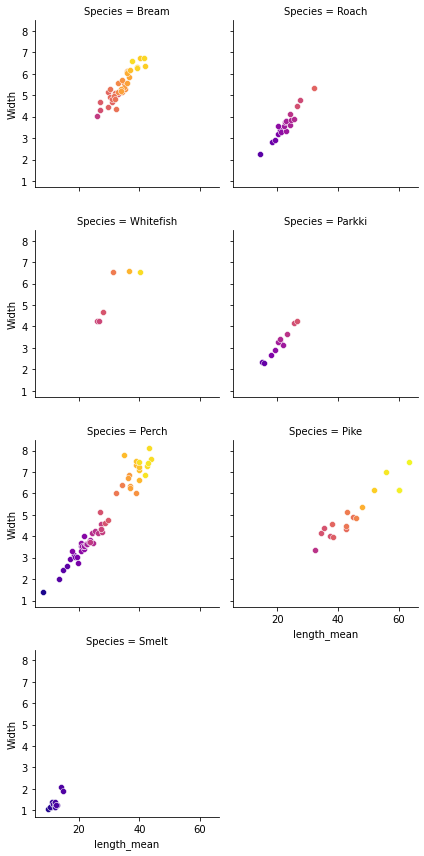

In [ ]:
#First checking for the correlations between 'length_mean' and 'Width'

grid=sns.FacetGrid(data=fish_mult,col='Species',hue='Weight',col_wrap=2,palette='plasma')
grid.map(sns.scatterplot,'length_mean','Width')
plt.show()

#It shows that each specie has a positive correlation between their lengths and widths (Except WhiteFish), hence we can go with the model
#Here darker color means that fishes are heavier. You can then observe that as fishes gets Wider and Taller, they also get Heavier

In [ ]:
#Now to generate the predictions, the method is exactly same as you did with one numeric and one categorical as explanatory

length_mean=np.arange(10,80,10)
Width=np.arange(3,7,0.1)
p=product(length_mean,Width)
explanatory_data = pd.DataFrame(p,columns=['length_mean','Width'])
prediction_data = explanatory_data.assign(Weight=model_mult_numeric.predict(explanatory_data))
print(prediction_data)

#You can also apply interactive model with a slight change in generating the model as: model_mult_numeric=ols('Weight ~ Width * length_mean',data=fish_mult).fit(). This will give you one extra slope term for the effect of interaction between two explanatory variables

     length_mean  Width       Weight
0             10    3.0   -89.304968
1             10    3.1   -81.978115
2             10    3.2   -74.651262
3             10    3.3   -67.324409
4             10    3.4   -59.997556
..           ...    ...          ...
275           70    6.5  1403.124366
276           70    6.6  1410.451219
277           70    6.7  1417.778072
278           70    6.8  1425.104925
279           70    6.9  1432.431778

[280 rows x 3 columns]


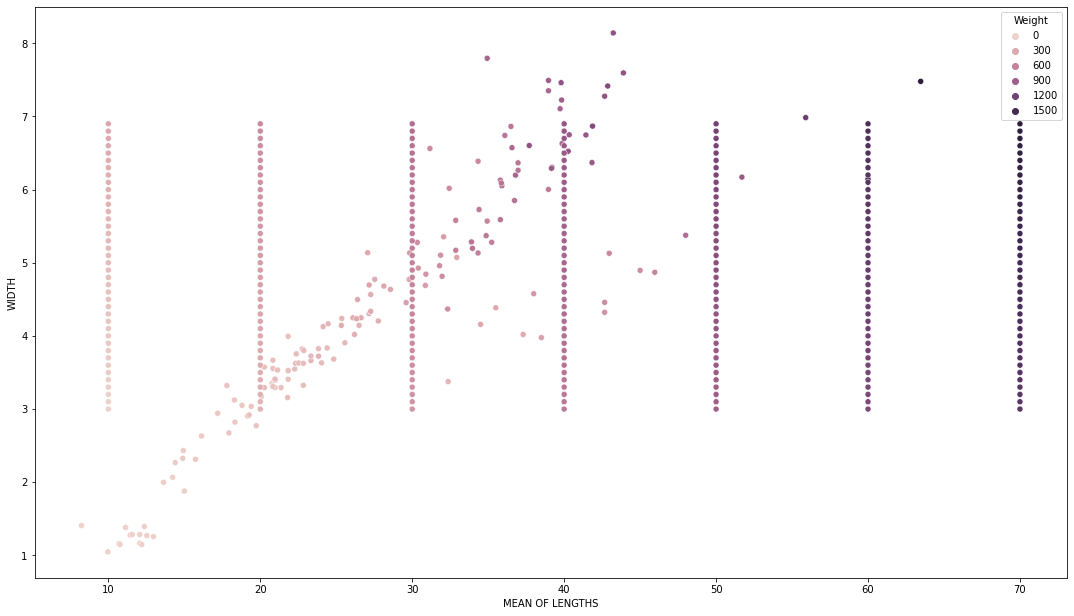

In [ ]:
#Visualzing our model

figC = matplotlib.pyplot.gcf()
sns.scatterplot(x='length_mean',y='Width',hue='Weight',data=fish_mult)
sns.scatterplot(x='length_mean',y='Width',hue='Weight',data=prediction_data,legend=False)
figC.set_size_inches(18.5, 10.5, forward=True)
plt.xlabel('MEAN OF LENGTHS')
plt.ylabel('WIDTH')
plt.show()

#The dark color shows the heaviest fishes that are at the top right column where the fishes are taller and wider

In [ ]:
#What if we have more than 2 explanatory variables? There is a same way to prepare the model and make predictions with few new terminologies. However, it's difficult to visualize such models and so we limit our works to just making predictions

model_mult_exp=ols('Weight ~ length_mean * Width * Species + 0',data=fish_mult).fit() #For 3-way interaction. For 2-way: ols('Weight ~ (length_mean + Width + Species) ** 2 + 0',data=fish_mult). For no interaction ols('Weight ~ length_mean + Width + Species + 0',data=fish_mult)
Width=np.arange(2,6,0.1)
length_mean=np.arange(10,80,10)
Species=fish_mult['Species'].unique()
p=product(length_mean,Width,Species)
explanatory_data=pd.DataFrame(p,columns=['length_mean','Width','Species'])
prediction_data=explanatory_data.assign(Weight=model_mult_exp.predict(explanatory_data))
print(prediction_data)

      length_mean  Width    Species       Weight
0              10    2.0      Bream  -417.587388
1              10    2.0      Roach     5.273613
2              10    2.0  Whitefish   700.235469
3              10    2.0     Parkki    41.563615
4              10    2.0      Perch     2.433715
...           ...    ...        ...          ...
1955           70    5.9  Whitefish  2022.594719
1956           70    5.9     Parkki  1354.014050
1957           70    5.9      Perch  1582.721678
1958           70    5.9       Pike  1958.451311
1959           70    5.9      Smelt   288.419849

[1960 rows x 4 columns]


### **HYPOTHESIS TESTING**

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


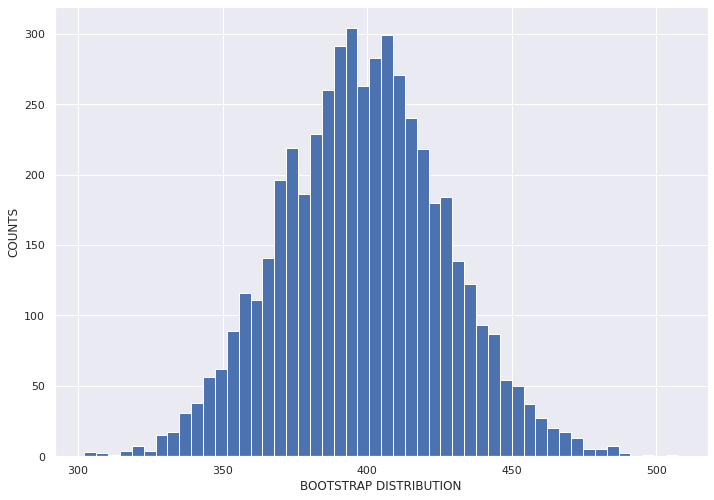

AttributeError: ignored

In [ ]:
#Firstly we are trying to make a decision that mean Weight of whole dataset is different or same from mean Weight of sample dataset. As we can see that the histogram shows a bell-curve that means our sample data is normally distributed hence we can apply one mean z-test. Further, the calculations of z-test showed that we have enough evidence to support that mean Weight of whole dataset is same as mean Weight of sample dataset.
#H0= Mean Weight of whole dataset is same to the mean Weight of sample dataset
#HA= Mean Weight of whole dataset is different from mean Weight of sample dataset

boot_dist=[]
for i in range(5000):
  boot_dist.append(np.mean(fish.sample(frac=1,replace=True))["Weight"])
plt.hist(boot_dist,bins=50)
plt.xlabel("BOOTSTRAP DISTRIBUTION")
plt.ylabel("COUNTS")
plt.show()
sample_statistics=np.mean(boot_dist)
standard_error=np.std(boot_dist,ddof=1)
hypothesized_value=np.mean(fish["Weight"])
Alpha=0.05
z_score=(sample_statistics-hypothesized_value)/standard_error
p_value=norm.cdf(-z_score,loc=0,scale=1)+(1-norm.cdf(z_score,loc=0,scale=1))
if p_value <= Alpha:
  print("We have enough evidence to support that mean Weight of whole dataset is different from mean Weight of sample dataset")
else:
  print("We have enough evidence to support that mean Weight of whole dataset is same as mean Weight of sample dataset")

In [ ]:
#Now we are trying to make a decision that mean Height of Bream and Parkki are same or different. We can apply two mean z-test
#H0= Mean Heights of species [Bream,Parkki] in the dataset are same
#HA= Mean Heights of species [Bream,Parkki] in the dataset are different

print(fish.groupby("Species")["Height"].mean())
print(fish.groupby("Species")["Height"].std())
print(fish.groupby("Species")["Height"].count())

In [ ]:
#Cont..

standard_error=np.sqrt(((1.964707 ** 2)/35)+((1.615650 ** 2)/11))
z_score=(15.183211-8.962427)/standard_error
p_value=norm.cdf(-z_score,loc=0,scale=1)+(1-norm.cdf(z_score,loc=0,scale=1))
Alpha=0.01
if p_value <= Alpha:
  print("We have enough evidence to support that mean Heights of Bream and Parkki are different")
else:
  print("We have enough evidence to support that mean Heights of Bream and Parkki are same")

In [ ]:
#Now we are trying to make a decision that mean Height of Bream and Parkki are same or different in our sample dataset. For sample datasets, we have done sampling for records of 30 per sample per specie. As sample size is <=30 hence we can apply two mean t-test.
#H0= Mean Heights of species [Bream,Parkki] in the sample dataset are same
#HA= Mean Heights of species [Bream,Parkki] in the sample dataset are different

fish_bream=fish[fish["Species"]=="Bream"]
fish_parkki=fish[fish["Species"]=="Parkki"]
boot_dist_bream=[]
boot_dist_parkki=[]
for i in range(5000):
  boot_dist_bream.append(np.mean(fish_bream.sample(n=30,replace=True))["Height"])
  boot_dist_parkki.append(np.mean(fish_parkki.sample(n=30,replace=True))["Height"])
bream_mean=np.mean(boot_dist_bream)
parkki_mean=np.mean(boot_dist_parkki)
bream_std=np.std(boot_dist_bream)
parkki_std=np.std(boot_dist_parkki)
standard_error=np.sqrt(((bream_std ** 2)/30)+((parkki_std ** 2)/30))
t_score=(bream_mean-parkki_mean)/standard_error
p_value=t.cdf(-t_score,df=58)+(1-t.cdf(t_score,df=58))
Alpha=0.01
if p_value <= Alpha:
  print("We have enough evidence to support that mean Heights of Bream and Parkki in sample are different")
else:
  print("We have enough evidence to support that mean Heights of Bream and Parkki in sample are same")

In [ ]:
#Now we are trying to make a decision that variances of Weights for different species in our dataset are same or not. Here we can apply the analysis of variance method "ANOVA".
#H0: Variances of Weights for different Species are same
#H1: Variances of Weights for different Species are not same

fish_anova=pingouin.anova(data=fish,dv="Weight",between="Species")

In [ ]:
#Cont..

p_value=fish_anova.iloc[0,4]
Alpha=0.01
if p_value <= Alpha:
  print("We have enough evidence to support that variances of Weights for different Species are not same")
else:
  print("We have enough evidence to support that variances of Weights for different Species are same")

In [ ]:
#Now let us find that which pairs are not having same variances

fish_pairwise=pingouin.pairwise_ttests(data=fish,dv="Weight",between="Species",padjust="none")
fish_pairwise[fish_pairwise["p-unc"]<=Alpha] #These are the pairs whose variances are not same with one another

In [ ]:
#Now let us find that which pairs are not having same variances with corrected p-value method (bonf)

fish_pairwise=pingouin.pairwise_ttests(data=fish,dv="Weight",between="Species",padjust="bonf")
fish_pairwise[fish_pairwise["p-unc"]<=Alpha] #These are the pairs whose variances are not same with one another

In [ ]:
#We are now trying to decide about the proportion of Perch Specie.

print(fish["Species"].value_counts(normalize=True))

#H0: Proportion of Perch is greater than 0.3
#HA: Proportion of Perch is less than 0.3

p0=0.3
p_hat=np.mean(fish["Species"]=="Perch") #You can calculate for any specie.
numerator=(p_hat-p0)
denominator=np.sqrt(p0*(1-p0)/len(fish))
z_proportion=numerator/denominator
p_value=norm.cdf(z_proportion)
Alpha=0.05
if p_value <= Alpha:
  print("We have enough evidence to support that proportion of Perch is less than 0.3")
else:
  print("We have enough evidence to support that proportion of Perch is greater than 0.3")

In [ ]:
#Uptil now we have applied parametric test that have various conditions on dataset. Now let us introduce to non parametric test. They are more reliable when sample size is small and data is not normally distributed. One of the test is Wilcoxon Non Parametric Test.
#H0: Mean of Length1 and Length2 for all species is same
#HA: Mean of Length1 is less than mean of Length2

fish_small=fish.head(10)
fish_wilcoxon=pingouin.wilcoxon(x=fish_small["Length1"],y=fish_small["Length2"],alternative="less")
p_value=fish_wilcoxon.iloc[0,2]
if p_value <= Alpha:
  print("We have enough evidence to support that mean of Length1 and Length2 for all species is same")
else:
  print("We have enough evidence to support that mean of Length1 is less than mean of Length2")

#As this test is an alternative for paired t-test and as our dataset is not having any dependent columns, also it is normally distributed, hence ambiguous answers can be expected.

In [ ]:
#Another such test as alternative for Anova is Kruskal Walls Test
#H0: Variances of Weights for different Species are same
#H1: Variances of Weights for different Species are not same

fish_kruskal=pingouin.kruskal(data=fish,dv="Weight",between="Species")
p_value=fish_kruskal.iloc[0,3]
Alpha=0.01
if p_value <= Alpha:
  print("We have enough evidence to support that variances of Weights for different Species are not same")
else:
  print("We have enough evidence to support that variances of Weights for different Species are same")

#As this test is an alternative for anova test, also it is normally distributed, hence ambiguous answers can be expected.

### **GRAPHING VISUALIZATIONS**

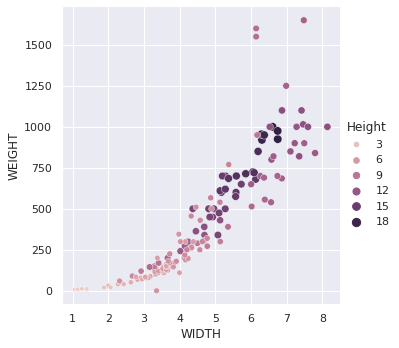

In [ ]:
#Conclusion can be drawn that any fish increasing width have a direct realtion with weight and increasing width will increase the weight and height of the fish

sns.relplot(x='Width',y='Weight',data=fish,kind='scatter',hue='Height',size='Height')
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.xlabel("WIDTH")
plt.ylabel("WEIGHT")
plt.show()

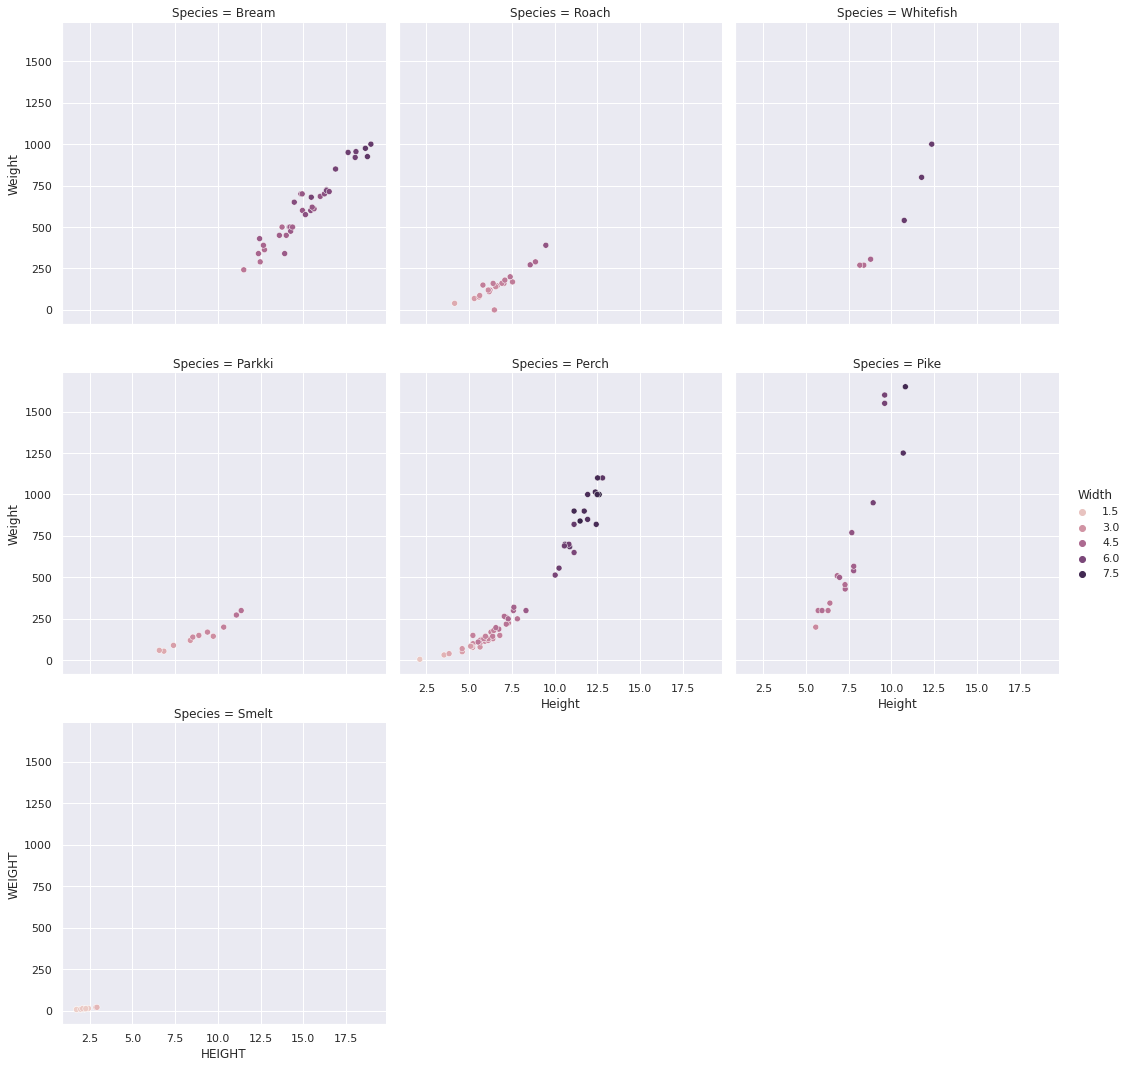

In [ ]:
#we can see individually now that how height is affecting the weight of the fish in any of the species, and what is the width realtion
#we can say that smelts have unifrom length,weight and width ------ while bream's height has a +ve realtion with its weight,but width remains almost same throughout

sns.relplot(x='Height',y='Weight',data=fish,kind='scatter',col='Species',hue='Width',col_wrap=3)
plt.xlabel("HEIGHT")
plt.ylabel("WEIGHT")
plt.show()

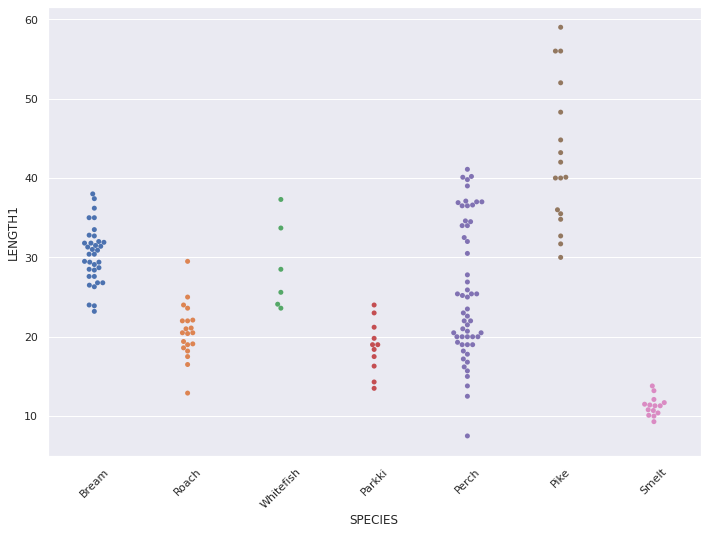

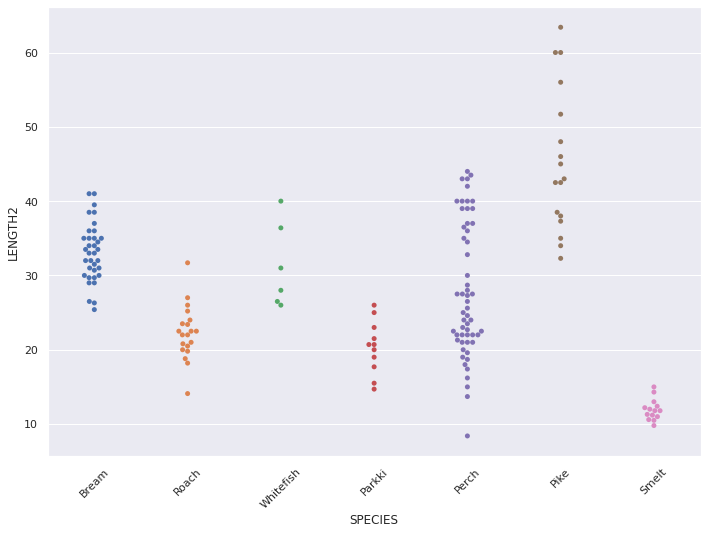

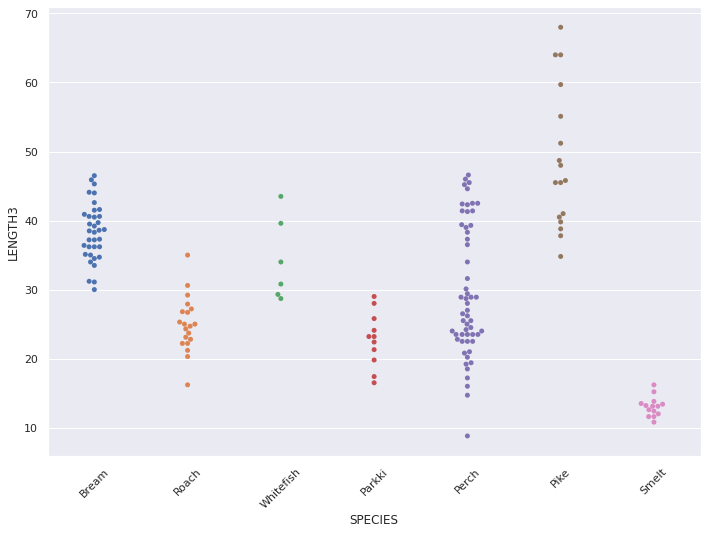

In [ ]:

#The plot shows that for a specific species what is the range of length in which they lie
#	        Bream 	Roachs	WhiteFish	Parkki	Perch	  Pike	  Smelt
#Length1	20-40	  18-25	  22-38	    15-25	  15-40	  30-60	  5-10
#Length2	25-42 	18-25	   22-40	  15-25	  15-45	  35-65	  5-10
#Length3	25-45	  20-30	  25-42	    18-30	  15-45	  38-65	  5-10

#which allows me draw conclusion that smelts have a lower length measured in all the dimensions and perch will have the highest length in all the dimensions

#Length1-Species
sns.swarmplot(x='Species',y='Length1',data=fish)
plt.xticks(rotation=45)
plt.xlabel("SPECIES")
plt.ylabel("LENGTH1")
plt.show()
plt.clf()

#Length2-Species
sns.swarmplot(x='Species',y='Length2',data=fish)
plt.xticks(rotation=45)
plt.xlabel("SPECIES")
plt.ylabel("LENGTH2")
plt.show()
plt.clf()

#Length3-Species
 
sns.swarmplot(x='Species',y='Length3',data=fish)
plt.xticks(rotation=45)
plt.xlabel("SPECIES")
plt.ylabel("LENGTH3")
plt.show()

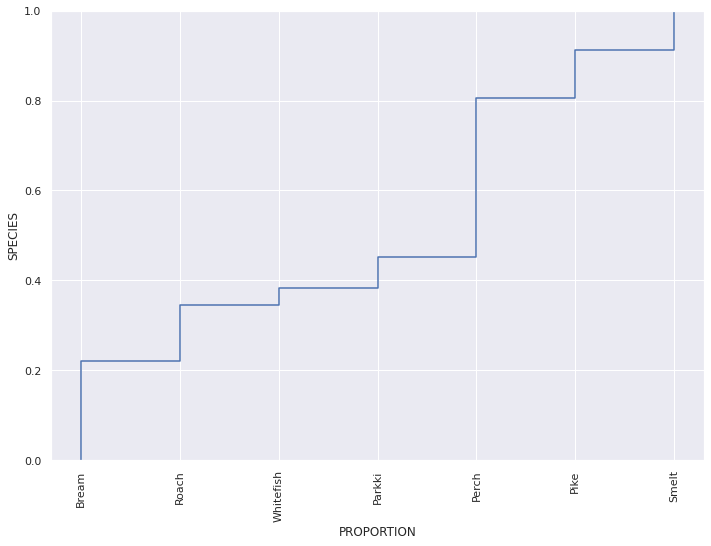

In [ ]:
#Ecumulative Distribution function tells us about the probability distriburion, like we tossed 2 coins what is the probability that no of head occur, as we know that total outcomes will be 2^n, so here also we will say that we have 4 outcomes
#0 time-> head  1 times
#1 time-> head  2 times
#2 time-> head  1 times
#what proportion 1/4,2/4,1/4, so we just marked that points and build lines, the higher the outcome generated by a single event will have a raise bar, so we will say that higher the bar raise higher the single event has proportion in the dataset

#In this scenario,perch covers the largest proportion in the dataset. while white fish has a very low proportion in the data set

sns.ecdfplot(x='Species',data=fish)
plt.xticks(rotation=90)
plt.ylabel("PROPORTION")
plt.xlabel("SPECIES")
plt.show()

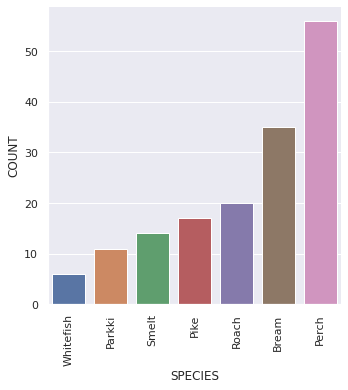

In [ ]:
#This countplot measures in the total count of the different species of fish recorded in the dataset

sns.catplot(x='Species',data=fish,kind='count',order=['Whitefish','Parkki','Smelt','Pike','Roach','Bream','Perch'])
plt.xticks(rotation=90)
plt.xlabel("SPECIES")
plt.ylabel("COUNT")
plt.show()

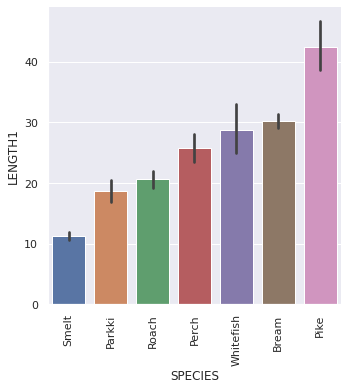

<Figure size 842.4x595.44 with 0 Axes>

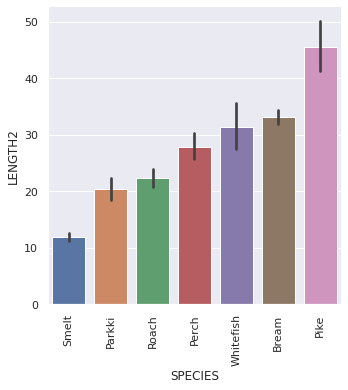

<Figure size 842.4x595.44 with 0 Axes>

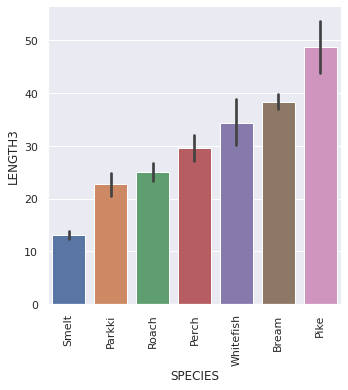

In [ ]:
#Species - Length1('Vertical length')
#Species on the x-axis in ascending order are sorted in accordance with mean of length measure of  on y-axis, the line above the bar represents that if another sample from a population is drawn, we are 95% confident that their mean Length measure of lies within it i.e. Confidence Interval
sns.catplot(x='Species',y='Length1',data=fish,kind='bar',order=['Smelt','Parkki','Roach','Perch','Whitefish','Bream','Pike'])
plt.xticks(rotation=90)
plt.xlabel("SPECIES")
plt.ylabel("LENGTH1")
plt.show()
plt.clf()

#Species - Length2('Diagonal Length')
#Species on the x-axis in ascending order are sorted in accordance with mean of length measure of  on y-axis, the line above the bar represents that if another sample from a population is drawn, we are 95% confident that their mean Length measure of lies within it i.e. Confidence Interval
sns.catplot(x='Species',y='Length2',data=fish,kind='bar',order=['Smelt','Parkki','Roach','Perch','Whitefish','Bream','Pike'])
plt.xticks(rotation=90)
plt.xlabel("SPECIES")
plt.ylabel("LENGTH2")
plt.show()
plt.clf()

#Species - Length3('Cross Length')
#Species on the x-axis in ascending order are sorted in accordance with mean of length measure of  on y-axis, the line above the bar represents that if another sample from a population is drawn, we are 95% confident that their mean Length measure of lies within it i.e. Confidence Interval
sns.catplot(x='Species',y='Length3',data=fish,kind='bar',order=['Smelt','Parkki','Roach','Perch','Whitefish','Bream','Pike'])
plt.xticks(rotation=90)
plt.xlabel("SPECIES")
plt.ylabel("LENGTH3")
plt.show()

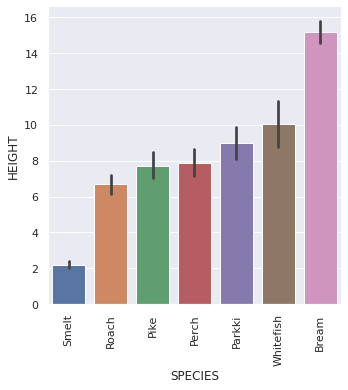

<Figure size 842.4x595.44 with 0 Axes>

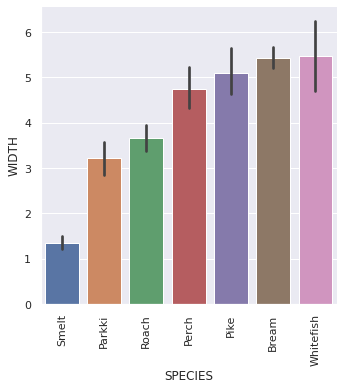

<Figure size 842.4x595.44 with 0 Axes>

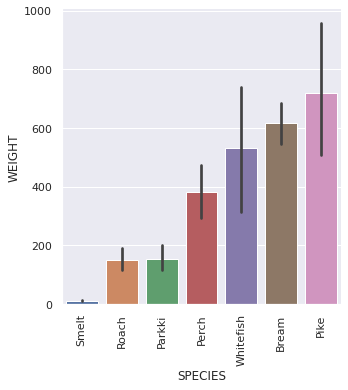

In [ ]:
#Species - Height
#Species on the x-axis in ascending order are sorted in accordance with mean of height on y-axis, the line above the bar represents that if another sample from a population is drawn, we are 95% confident that their mean height lies within it i.e. Confidence Interval
sns.catplot(x='Species',y='Height',data=fish,kind='bar',order=['Smelt','Roach','Pike','Perch','Parkki','Whitefish','Bream'])
plt.xticks(rotation=90)
plt.xlabel("SPECIES")
plt.ylabel("HEIGHT")
plt.show()
plt.clf()

#Species - Width
#Species on the x-axis in ascending order are sorted in accordance with mean of width on y-axis, the line above the bar represents that if another sample from a population is drawn, we are 95% confident that their mean width lies within it i.e. Confidence Interval
sns.catplot(x='Species',y='Width',data=fish,kind='bar',order=['Smelt','Parkki','Roach','Perch','Pike','Bream','Whitefish'])
plt.xticks(rotation=90)
plt.xlabel("SPECIES")
plt.ylabel("WIDTH")
plt.show()
plt.clf()


#Species - Weight
#Species on the x-axis in ascending order are sorted in accordance with mean of weight on y-axis, the line above the bar represents that if another sample from a population is drawn, we are 95% confident that their mean weight lies within it i.e. Confidence Interval
sns.catplot(x='Species',y='Weight',data=fish,kind='bar',order=['Smelt','Roach','Parkki','Perch','Whitefish','Bream','Pike'])
plt.xticks(rotation=90)
plt.xlabel("SPECIES")
plt.ylabel("WEIGHT")
plt.show()


#note we can specify the ci='sd' argument so that to have confidence interval of standard deviation, which means the total number of observations(around mean) calculated next time 

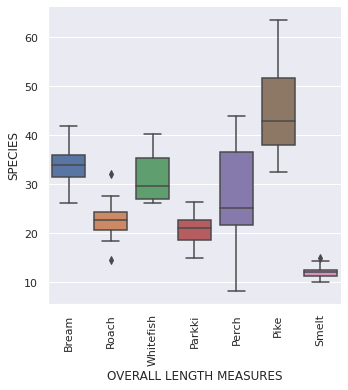

In [ ]:
#Mean length of all lengths i.e. Length1,Length2,Length3 have been taken as to find out that what is the mean length of specific fishes
_=fish['Overall Length Measures']=(fish['Length1']+fish['Length2']+fish['Length3'])/3
sns.catplot(x='Species',y='Overall Length Measures',data=fish,kind='box',)
plt.xticks(rotation=90)
plt.xlabel("OVERALL LENGTH MEASURES")
plt.ylabel("SPECIES")
plt.show()

### **DATA MANIPULATION**

In [ ]:
#First of all, let us check that if there are any missing values in any column

fish.isna().sum() #It will return the sum of missing values for each column.The output shows that our dataset is perfectly clean.

Species           0
Weight            0
Length1           0
Length2           0
Length3           0
Height            0
Width             0
leverage          0
cooks_distance    0
dtype: int64

In [ ]:
#Now, let us make the column of "Species" as index column.

fish.set_index(["Species"])

,Weight,Length1,Length2,Length3,Height,Width,leverage,cooks_distance
Species,,,,,,,,
Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0.008528,0.005807
Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0.010531,0.007367
Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0.010288,0.003038
Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0.011157,0.006911
Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0.010445,0.000675
...,...,...,...,...,...,...,...,...
Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936,0.022599,0.008589
Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690,0.021029,0.012698
Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558,0.021726,0.012333


In [ ]:
#Let us add a new column to our dataframe, length of their specie name.

for index,row in fish.iterrows():
  fish.loc[index,"Length_Species"]=len(row["Species"])
fish.head(6)

,Species,Weight,Length1,Length2,Length3,Height,Width,leverage,cooks_distance,Length_Species
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200,0.008528,0.005807,5.0
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056,0.010531,0.007367,5.0
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961,0.010288,0.003038,5.0
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555,0.011157,0.006911,5.0
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340,0.010445,0.000675,5.0
5,Bream,450.0,26.8,29.7,34.7,13.6024,4.9274,0.013679,0.005779,5.0


In [ ]:
#Further, let us perform some basic functions on the columns of our dataset

def pct30(column):
    return column.quantile(0.3) #It will split out the column thirtiest percentile
def pct40(column):
    return column.quantile(0.4) #It will split out the column thirtiest percentile. You can modify the code for any percentile
fish["Length3"].agg([pct30,pct40]) #For calculating one percentile, just write: fish["Length3"].agg(pct40). You can modify the code for any column

pct30    23.82
pct40    26.54
Name: Length3, dtype: float64

In [ ]:
#We can also apply some conditions on our dataset to visualize the rows accordingly

first_cond=fish["Length1"] > 50
second_cond=fish["Length2"] > 55
fish[first_cond & second_cond] #It will display only those rows in which "Length1" > 50 AND "Length2" > 55. You can modify the conditions and the column on which conditions are applied to further visualize different subsets of data. In one line you can do like: fish[np.logical_and(fish["Length1"]>50,fish["Length2"]>55)]. For one condition you can do like: is_more=fish["Length1"]>50
                                                                                                                                                                                                                                                                                                                                                                            #fish[is_more]

,Species,Weight,Length1,Length2,Length3,Height,Width,leverage,cooks_distance,Length_Species
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849,0.007303,0.014413,4.0
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440,0.006426,0.007177,4.0
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440,0.006426,0.007177,4.0
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800,0.007457,0.022066,4.0


In [ ]:
#Also, various data manipulation techniques requires sorting of data. You can sort the data as:

fish_sort=fish
fish_sort.sort_values(["Length1","Length2","Length3","Width","Height","Weight"],ascending=[False,True,False,True,True,False]) #You can limit the sorting to some columns and modify the code for ascending and descending orders. But for one column only, you can write: fish_sort.sort_values("Length1",ascending=False)

,Species,Weight,Length1,Length2,Length3,Height,Width,leverage,cooks_distance,Length_Species
144,Pike,1650.0,59.0,63.4,68.0,10.8120,7.4800,0.007457,0.022066,4.0
142,Pike,1600.0,56.0,60.0,64.0,9.6000,6.1440,0.006426,0.007177,4.0
143,Pike,1550.0,56.0,60.0,64.0,9.6000,6.1440,0.006426,0.007177,4.0
141,Pike,1250.0,52.0,56.0,59.7,10.6863,6.9849,0.007303,0.014413,4.0
140,Pike,950.0,48.3,51.7,55.1,8.9262,6.1712,0.006290,0.009371,4.0
...,...,...,...,...,...,...,...,...,...,...
148,Smelt,9.7,10.4,11.0,12.0,2.1960,1.3800,0.022102,0.009305,5.0
147,Smelt,7.0,10.1,10.6,11.6,1.7284,1.1484,0.024360,0.012303,5.0
146,Smelt,7.5,10.0,10.5,11.6,1.9720,1.1600,0.023165,0.013205,5.0
145,Smelt,6.7,9.3,9.8,10.8,1.7388,1.0476,0.024309,0.014933,5.0


In [ ]:
#Now here we are finding out the sum, min, and max of "Height", "Width",and "Length1" for each "Species" respectively

fish.groupby("Species")[["Height","Width","Length1"]].agg([sum,min,max]) #Similarly you can add more columns like: "Length2","Length3","Wight" to find out their sum, min,max (more functions can be added), etc

Height                       Width                 Length1        \
                sum      min      max       sum     min     max     sum   min   
Species                                                                         
Bream      531.4124  11.5200  18.9570  189.9665  4.0200  6.7497  1060.7  23.2   
Parkki      98.5867   6.5772  11.3680   35.4281  2.3142  4.2340   206.0  13.5   
Perch      440.2647   2.1120  12.8002  265.7605  1.4080  8.1420  1441.2   7.5   
Pike       131.1341   5.5680  10.8120   86.4685  3.3756  7.4800   722.1  30.0   
Roach      133.8959   4.1472   9.4850   73.1570  2.2680  5.3550   412.9  12.9   
Smelt       30.9312   1.7284   2.9322   18.7613  1.0476  2.0672   157.6   9.3   
Whitefish   60.1630   8.1454  12.3540   32.8383  4.2476  6.5736   172.8  23.6   

                 
            max  
Species          
Bream      38.0  
Parkki     24.0  
Perch      41.1  
Pike       59.0  
Roach      29.5  
Smelt      13.8  
Whitefish  37.3

In [ ]:
#Here the below code is to check that how many fishes lie in a particular "Species" (count of fishes for each specie)

fish.pivot_table(values=["Height","Width","Length1"],index="Species",aggfunc=['count','min','max']) #You can also use any other column instead of "Width" for values, as we just have to count the number of fishes.

count                    min                      max          \
          Height Length1 Width   Height Length1   Width   Height Length1   
Species                                                                    
Bream         35      35    35  11.5200    23.2  4.0200  18.9570    38.0   
Parkki        11      11    11   6.5772    13.5  2.3142  11.3680    24.0   
Perch         56      56    56   2.1120     7.5  1.4080  12.8002    41.1   
Pike          17      17    17   5.5680    30.0  3.3756  10.8120    59.0   
Roach         20      20    20   4.1472    12.9  2.2680   9.4850    29.5   
Smelt         14      14    14   1.7284     9.3  1.0476   2.9322    13.8   
Whitefish      6       6     6   8.1454    23.6  4.2476  12.3540    37.3   

                   
            Width  
Species            
Bream      6.7497  
Parkki     4.2340  
Perch      8.1420  
Pike       7.4800  
Roach      5.3550  
Smelt      2.0672  
Whitefish  6.5736